In [2]:
import os
import os.path as osp

from yolo_detection import *
from hough_circle_detection import *
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
path_ds = "../../datasets/"
path_ds_test = osp.join(path_ds, "droplets", "test", "original")

In [4]:
path_images = [osp.join(path_ds_test, x) for x in os.listdir(path_ds_test)]

In [5]:
idx = 14

## YOLO

In [5]:
list_circles = get_circles_yolov5(path_images[idx], weights="../../models/yolo_best.pt")

YOLOv5 🚀 v6.0-151-gabbdd48 torch 1.10.0 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs


DetectMultiBackend(
  (model): Model(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
        

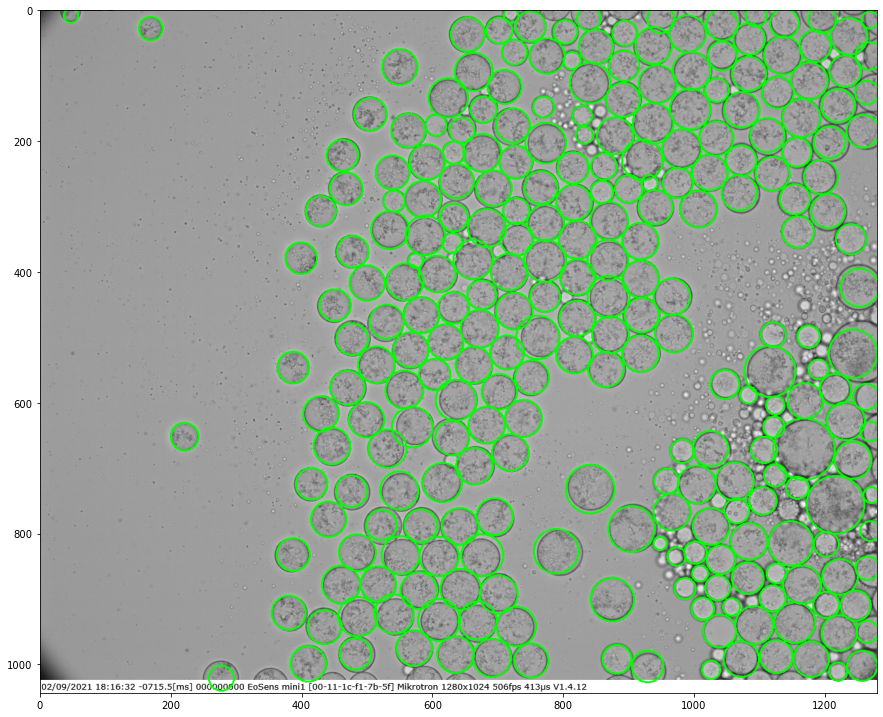

In [6]:
image = cv2.imread(path_images[idx])

image_copy = image.copy()
for circles in list_circles:
    for circle in circles:
        image_copy = cv2.circle(image_copy, (circle[0].astype(int), circle[1].astype(int)), circle[2].astype(int), (0, 255, 0), 2)

plt.figure(figsize=(15, 15))
plt.imshow(image_copy)

## Hough

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [11]:
list_circles = hough_circle_detection(gray)

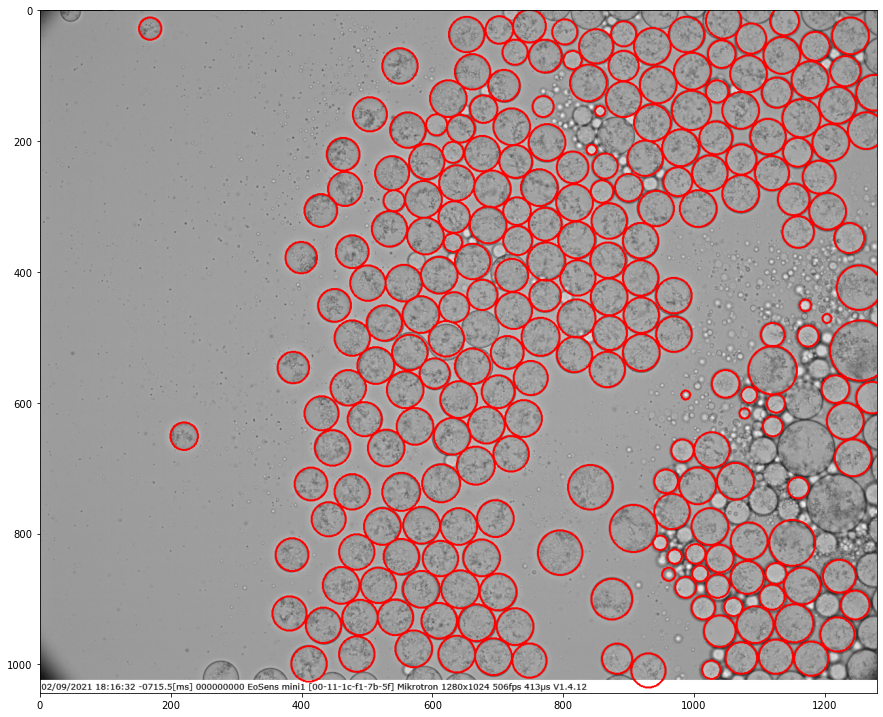

In [12]:
image_copy = image.copy()
for circles in list_circles:
    for circle in circles:
        image_copy = cv2.circle(image_copy, (circle[0].astype(int), circle[1].astype(int)), circle[2].astype(int), (255, 0, 0), 2)

plt.figure(figsize=(15, 15))
plt.imshow(image_copy, cmap="gray", vmin=0, vmax=255)